In [ ]:
# 面试能够通过
# 技术能力，30~40%
# 软实力，60~70%

### 核函数在回归中应用

#### 创建数据

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

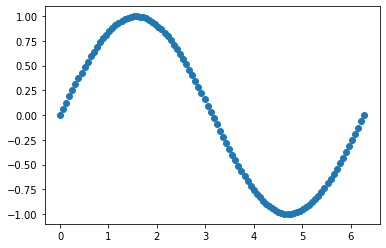

In [3]:
X = np.linspace(0,2*np.pi,100).reshape(-1,1)
y = np.sin(X)

plt.scatter(X,y)

In [4]:
print(X,y)

[[0.        ]
 [0.06346652]
 [0.12693304]
 [0.19039955]
 [0.25386607]
 [0.31733259]
 [0.38079911]
 [0.44426563]
 [0.50773215]
 [0.57119866]
 [0.63466518]
 [0.6981317 ]
 [0.76159822]
 [0.82506474]
 [0.88853126]
 [0.95199777]
 [1.01546429]
 [1.07893081]
 [1.14239733]
 [1.20586385]
 [1.26933037]
 [1.33279688]
 [1.3962634 ]
 [1.45972992]
 [1.52319644]
 [1.58666296]
 [1.65012947]
 [1.71359599]
 [1.77706251]
 [1.84052903]
 [1.90399555]
 [1.96746207]
 [2.03092858]
 [2.0943951 ]
 [2.15786162]
 [2.22132814]
 [2.28479466]
 [2.34826118]
 [2.41172769]
 [2.47519421]
 [2.53866073]
 [2.60212725]
 [2.66559377]
 [2.72906028]
 [2.7925268 ]
 [2.85599332]
 [2.91945984]
 [2.98292636]
 [3.04639288]
 [3.10985939]
 [3.17332591]
 [3.23679243]
 [3.30025895]
 [3.36372547]
 [3.42719199]
 [3.4906585 ]
 [3.55412502]
 [3.61759154]
 [3.68105806]
 [3.74452458]
 [3.8079911 ]
 [3.87145761]
 [3.93492413]
 [3.99839065]
 [4.06185717]
 [4.12532369]
 [4.1887902 ]
 [4.25225672]
 [4.31572324]
 [4.37918976]
 [4.44265628]
 [4.50

#### 线性核函数建模

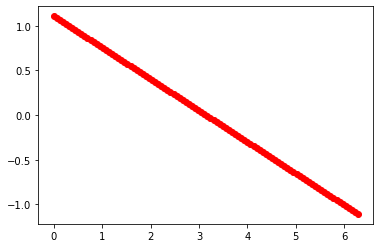

In [8]:
model = SVR(kernel='linear')

model.fit(X,y.ravel()) # 学习，总结规律

y_ = model.predict(X) # 根据规律预测

plt.scatter(X,y_,color = 'red')

#### poly多项式

0.23205291799121175

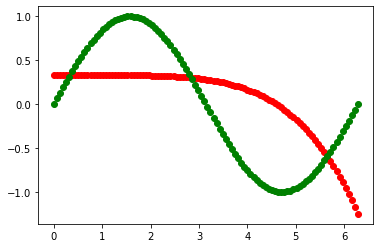

In [15]:
model = SVR(kernel='poly',degree=5)

model.fit(X,y.ravel()) # 学习，总结规律

y_ = model.predict(X) # 根据规律预测

plt.scatter(X,y_,color = 'red')
plt.scatter(X,y,color = 'green')
model.score(X,y)

#### rbf(高斯核函数)

0.9892073177718077

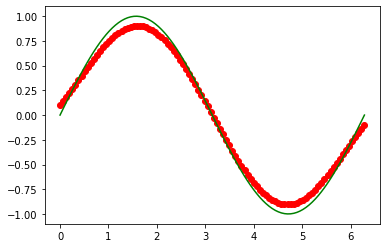

In [14]:
model = SVR(kernel='rbf')

model.fit(X,y.ravel()) # 学习，总结规律

y_ = model.predict(X) # 根据规律预测

plt.scatter(X,y_,color = 'red')
plt.plot(X,y,color = 'green')
model.score(X,y)

### 天猫双十一销量预测

#### 创建数据

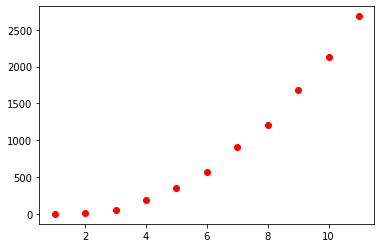

In [16]:
X = np.arange(2009,2020) - 2008 # 特征工程

y = np.array([0.5,9.36,52,191,350,571,912,1207,1682,2135,2684])

plt.scatter(X,y,color = 'red')

In [17]:
# 划分份数多，画图，曲线平滑
X_test = np.linspace(2009,2019,100).reshape(-1,1) - 2008

#### 线性核函数

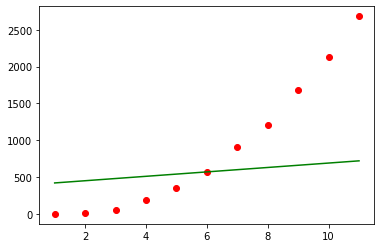

In [19]:
model = SVR(kernel='linear')

model.fit(X.reshape(-1,1),y)

y_ = model.predict(X_test)
plt.scatter(X,y,color = 'red')
plt.plot(X_test.ravel(),y_,color= 'green')

#### 高斯核函数

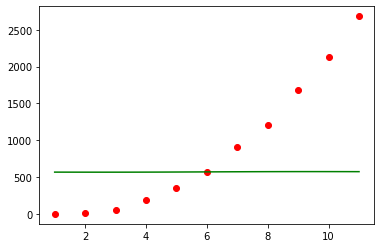

In [20]:
model = SVR(kernel='rbf')

model.fit(X.reshape(-1,1),y)

y_ = model.predict(X_test)
plt.scatter(X,y,color = 'red')
plt.plot(X_test.ravel(),y_,color= 'green')

#### poly多项式

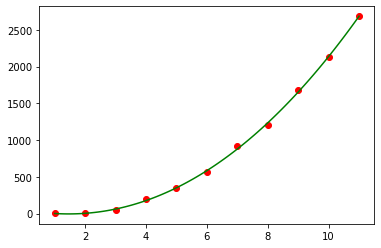

In [22]:
model = SVR(kernel='poly',degree=3,coef0=100) # coef0表示截距

model.fit(X.reshape(-1,1),y)

y_ = model.predict(X_test)
plt.scatter(X,y,color = 'red')
plt.plot(X_test.ravel(),y_,color= 'green')

### 人脸识别

In [53]:
# 百度网盘下载数据
# C:\Users\路丰坤\scikit_learn_data【创建文件夹】
# 解压缩到当前文件夹

#### 导包

In [54]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

#### 加载数据

In [55]:
# 加载人脸数据，labled faces wild
data = datasets.fetch_lfw_people(resize=1,min_faces_per_person=70)

X = data['data']
y = data['target']
faces = data['images'] # 图片
display(X.shape,faces.shape,y.shape)
target_names = data['target_names']
target_names

(1288, 11750)

(1288, 125, 94)

(1288,)

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

#### 可视化看数据

George W Bush


(125, 94)

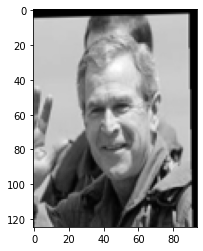

In [56]:
index = np.random.randint(0,1288,size = 1)[0]
face = X[index].reshape(125,94)
name = y[index] # 根据索引获取，名字

print(target_names[name])

display(face.shape)
plt.imshow(face,cmap = 'gray')

#### 数据降维

In [57]:
%%time
# 进行数据的降维
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
display(X.shape,X_pca.shape)

(1288, 11750)

(1288, 303)

CPU times: total: 26.7 s
Wall time: 4.59 s


#### 建模

In [66]:
%%time
# 降维之后的数据
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,random_state=1024)

# 参数C惩罚项，越大，容忍错误就会越小
# C越大，趋势：想方设法，把数据分开
# 造成过拟合
svc = SVC(C = 1)
svc.fit(X_train,y_train)
print('训练数据的得分：',svc.score(X_train,y_train))
print('测试数据的得分：',svc.score(X_test,y_test))

训练数据的得分： 0.9037267080745341
测试数据的得分： 0.6832298136645962
CPU times: total: 562 ms
Wall time: 577 ms


In [59]:
# 人脸验证，火车站，刷脸进站，对比相似度【人工验票，这么回事】方法
# 人脸识别，一堆人脸中，训练，分类，差异

#### 海选合适参数

In [61]:
np.set_printoptions(suppress=True)
np.logspace(-3,3,50)

array([   0.001     ,    0.00132571,    0.00175751,    0.00232995,
          0.00308884,    0.00409492,    0.00542868,    0.00719686,
          0.00954095,    0.01264855,    0.01676833,    0.02222996,
          0.02947052,    0.0390694 ,    0.05179475,    0.06866488,
          0.09102982,    0.12067926,    0.15998587,    0.21209509,
          0.28117687,    0.37275937,    0.49417134,    0.65512856,
          0.86851137,    1.1513954 ,    1.52641797,    2.02358965,
          2.6826958 ,    3.55648031,    4.71486636,    6.25055193,
          8.28642773,   10.98541142,   14.56348478,   19.30697729,
         25.59547923,   33.93221772,   44.98432669,   59.63623317,
         79.06043211,  104.81131342,  138.94954944,  184.20699693,
        244.20530945,  323.74575428,  429.19342601,  568.9866029 ,
        754.31200634, 1000.        ])

In [62]:
%%time
svc = SVC()
params = {'C':np.logspace(-3,3,50),'kernel':['rbf','poly','liner'],'tol':[0.01,0.001,0.0001]}
gc = GridSearchCV(estimator=svc,param_grid=params,cv = 5)
gc.fit(X_pca,y)

d:\soft\python\396\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
750 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "d:\soft\python\396\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\soft\python\396\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "d:\soft\python\396\lib\site-packages\sklearn\svm\_base.py", line 333, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklear

CPU times: total: 8min 4s
Wall time: 8min 12s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([   0.001     ,    0.00132571,    0.00175751,    0.00232995,
          0.00308884,    0.00409492,    0.00542868,    0.00719686,
          0.00954095,    0.01264855,    0.01676833,    0.02222996,
          0.02947052,    0.0390694 ,    0.05179475,    0.06866488,
          0.09102982,    0.12067926,    0.15998587,    0.21209509,
          0.28117687,    0.37275937,    0.49417134,    0.65512856,
          0.86851137,    1.1513954 ,    1.52641797,    2.02358965,
          2.6826958 ,    3.55648031,    4.71486636,    6.25055193,
          8.28642773,   10.98541142,   14.56348478,   19.30697729,
         25.59547923,   33.93221772,   44.98432669,   59.63623317,
         79.06043211,  104.81131342,  138.94954944,  184.20699693,
        244.20530945,  323.74575428,  429.19342601,  568.9866029 ,
        754.31200634, 1000.        ]),
                         'kernel': ['rbf', 'poly', 'liner'],
                         'tol': [0.01, 0.001, 0.0001]})

In [63]:
gc.best_score_

0.7383705848641149

In [64]:
gc.best_params_

{'C': 6.25055192527397, 'kernel': 'rbf', 'tol': 0.01}

In [65]:
y

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

#### 使用获得的最佳参数建模

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,random_state=1024)

svc = SVC(C = 6.25,kernel='rbf',tol = 0.01)

svc.fit(X_train,y_train)
# 特征工程上，数据处理，核心
# 算法，别人提供，我们处理数据
# 0和1，组成网络，虚拟世界
print('训练数据的得分：',svc.score(X_train,y_train))
print('测试数据的得分：',svc.score(X_test,y_test))

训练数据的得分： 1.0
测试数据的得分： 0.7732919254658385


#### 可视化

In [68]:
X_train_faces,X_test_faces,y_train,y_test = train_test_split(X,y,random_state=1024) # 原始数据拆分

In [69]:
y_predict = svc.predict(X_test[:50])
y_predict

array([3, 6, 1, 3, 2, 3, 5, 3, 3, 2, 6, 1, 0, 4, 3, 3, 2, 3, 5, 3, 3, 3,
       3, 3, 1, 2, 3, 4, 1, 1, 3, 4, 0, 3, 3, 2, 3, 3, 4, 1, 3, 2, 3, 3,
       3, 1, 3, 3, 1, 3], dtype=int64)

In [70]:
# 真实值
y_test[:50]

array([3, 2, 1, 3, 6, 3, 5, 3, 3, 2, 6, 1, 0, 4, 4, 5, 2, 3, 3, 3, 3, 5,
       3, 6, 1, 6, 3, 4, 1, 1, 3, 4, 0, 3, 3, 2, 3, 3, 4, 1, 1, 2, 3, 3,
       3, 1, 3, 3, 6, 3], dtype=int64)

In [71]:
X_test_faces.shape

(322, 11750)

In [74]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

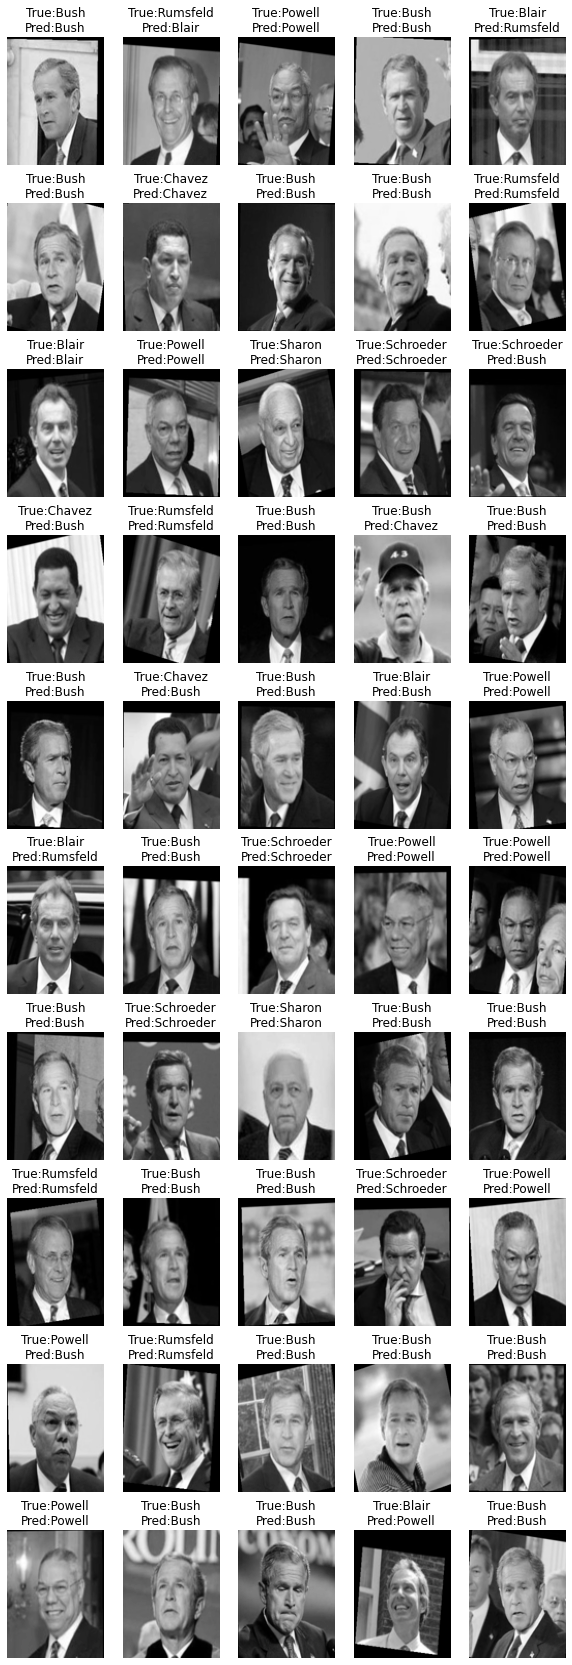

In [76]:
plt.figure(figsize=(5 * 2,10 * 3))
for i in range(50):
    plt.subplot(10,5,i + 1)
    plt.imshow(X_test_faces[i].reshape(125,94),cmap='gray')
    plt.axis('off')
    true_name = target_names[y_test[i]].split(' ')[-1]
    pred_name = target_names[y_predict[i]].split(' ')[-1]
    plt.title('True:%s\nPred:%s' % (true_name,pred_name))